#**DBSCAN**


#Step 1 : Import Libraries



In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [11]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)


#Step 3 : Modeling The Data Using DBSCAN



In [12]:
db=DBSCAN(eps=0.3,min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 183


['y', 'b', 'g', 'r']


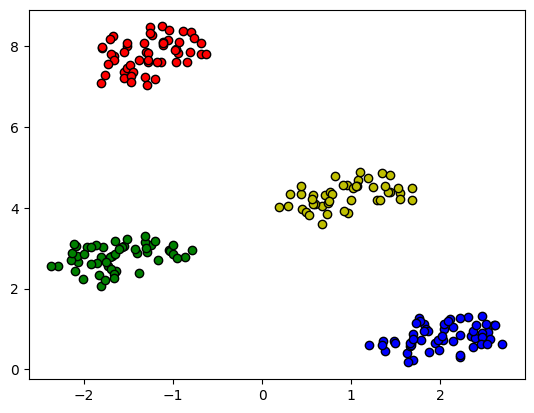

In [24]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [22]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, labels))
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Homogeneity: 0.543
Silhouette Coefficient: 0.047
Adjusted Rand Index: 0.26


#**Well Done :)**